# 활성화함수 시그모이드, 소프트맥스 구현

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
# 튜닝된 소프트맥스 함수
def softmax(z):
  c = np.max(z)
  exp_z = np.exp(z-c) # 분자
  sum_exp_z = np.sum(exp_z) # 분모
  
  y =  exp_z / sum_exp_z

  return y

# Data Load

In [ ]:
# tensorflow의 keras 데이터세트에서 불러오기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

mnist = datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# sklearn의 train_test_split아님. 애초에 되어있는거 그냥 불러오기만한거

11490434/11490434 [==============================] - 0s 0us/step


# 데이터 형상 확인
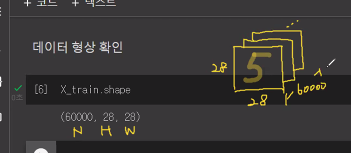

In [ ]:
X_train.shape, y_train.shape
# 28X28짜리 이미지 60000장
# 채널차원이없네? Gray scale 이미지다!

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
# 첫번째 이미지 데이터만 가져오기
image = X_train[0]
image.shape

(28, 28)

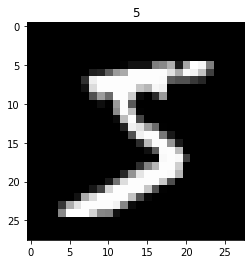

In [ ]:
plt.imshow(image, 'gray')
plt.title(y_train[0])
plt.show()

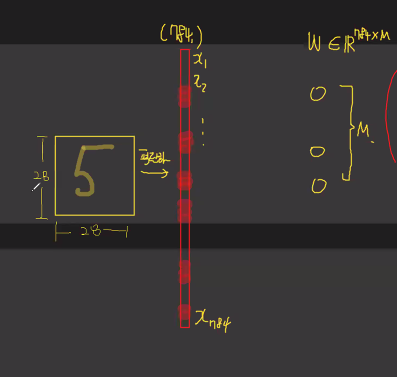

W 가중치는 784 X m 형태여야

데이터를 신경망에 넣을 준비 - 훈련, 테스트 모두 동일한 데이터의 feature의 개수를 가져야 한다.
* 신경망은 평평하게 펴진 1차원 배열을 입력으로 받고 있다.
* 즉 지금 우리가 사용할 신경망에 집어 넣을 데이터 1개의 형상은 1차원 배열 형태로 들어가야 한다.
* 평평하게 펴진 데이터를 기반으로 예측을 수행하는 레이어⭐⭐⭐
  * 신경망 - Dense Layer⭐
  * 기하학 - Affine Layer⭐
  * 통합적 - F.C Layer ( Fully Connected Layer ) - 전결합( 완전 연결 계층 )⭐
  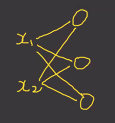FC
------
신경망에 이미지 데이터를 입력할 수 있는 경우 확인하기
* 장수에 대한 정보 없이 가로 세로 픽셀에 대한 정보만 있는 상황 : `(28, 28)` -> X
* 장수에 대한 정보 없이 평탄화 시킨 상황 : `(784, )` -> O(일단은 허용. Tensorflow나 Pytorch 같은 머신러닝 라이브러리에서는 허용 X 2차원배열로 만들어줘야)
-----
`60000`장의 이미지 데이터가 `(28, 28)`인 경우. 즉 `(60000, 28, 28)`
* 장수 데이터가 있는 상태에서 가로 세로 픽셀에 대한 정보만 있는 상황 : `(60000, 28, 28)` -> X
* 장수 데이터가 있는 상태에서 평탄화 시킨 상황 : `(60000, 784)` -> O
------
입력되는 데이터의 차원이 `(N, M)`이면 신경망 F.C 레이어에 집어 넣을 수 있다.
* `N` : BATCH_SIZE( 데이터의 개수 )
* `M` : 데이터 스칼라의 개수
  * 배치를 이야기 하지 않는 경우 : `(M, )`
  * 배치를 이야기 하면 : `(N, M)`
  
**참고로 CNN은 Fully Connected Layer가 아니고, 2차원 배치 데이터를 사용하지 않기 때문에 (N, H, W, C)가 됩니다.**

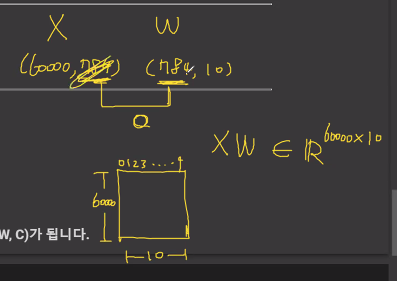

6만장에대한 10개의 확률정보만남음!

1행 0 1 2 3 4 5 6 7 8 9 확률

In [ ]:
image_flatten = image.flatten()
image_flatten.shape

(784,)

In [ ]:
# 일반적으론 reshape(-1)쓰긴함
image_reshape = image.reshape(-1)
image_reshape.shape

(784,)

In [ ]:
# 텐서플로우나 파이토치 등 머신러닝(딥러닝) 프레임워크에 데이터를 넣기 위해서는 1차원 배열 아닌, 2차원 배열이 필요!!
image_for_dl = image.reshape(1,-1) # 1장에대한,  784개의 데이터
image_for_dl.shape

(1, 784)

In [ ]:
X_train.shape # 이상태로는 못넣음

(60000, 28, 28)

In [ ]:
X_train_reshaped = X_train.reshape(60000,-1) # 6만장에대한 평탄화된데이터
X_train_reshaped.shape

(60000, 784)

미리 필요한 부분을 딕셔너리 던, 리스트 던, 튜플 이던 저장을 해놓는 것


근데 문자열이 아닌 객체를 파일에 쓸 수 없기에,



pickle 모듈을 활용해 그 객체 자체를 바이너리로 저장하는 것 

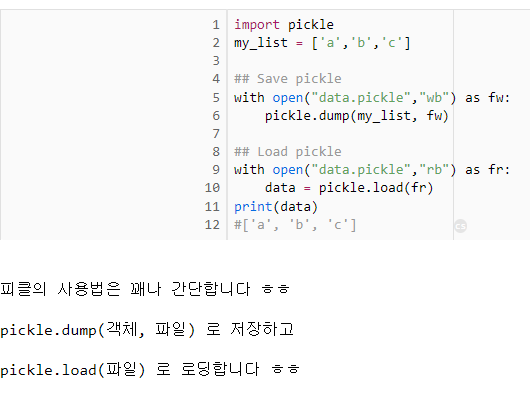

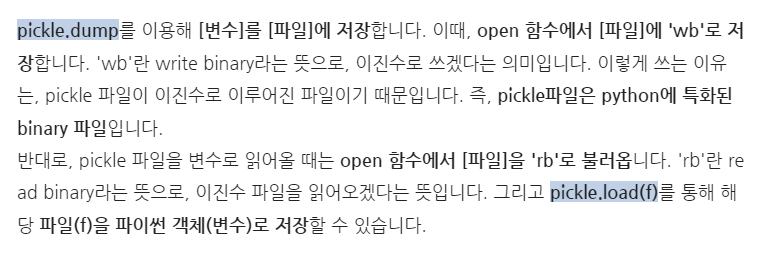

In [ ]:
# 3층신경망의 가중치, 편향이 들어있음
# 책의 저자가 이미 학습 다 해놓은거
import pickle
with open("./sample_weight.pkl", "rb") as f:
  network = pickle.load(f)

In [ ]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [ ]:
# 1층 가중치, 편향
W1, b1 = network["W1"], network['b1']

# 2층 가중치, 편향
W2, b2 = network["W2"], network['b2']

# 3층 가중치, 편향
W3, b3 = network["W3"], network['b3']

In [ ]:
W1.shape, W2.shape, W3.shape

((784, 50), (50, 100), (100, 10))

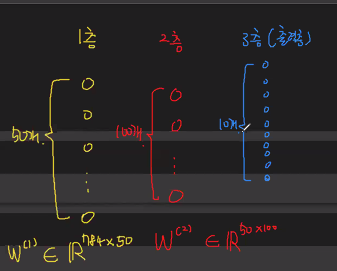

In [ ]:
# X_test에서 인덱스 1521번째 데이터를 예측하는 네트워크 생성
# 1,2,층의 활성화함수는 sigmoid
# 3층의 활성화 함수는  softmax사용

X_test_1521 = X_test.reshape(10000, -1)[1520]
X_test_1521

z1 = X_test_1521 @ W1 + b1 # 1층
a1 = sigmoid(z1)
print(a1.shape)


z2 = a1 @ W2 + b2 # 2층
a2 = sigmoid(z2)
print(a2.shape)


z3 = a2 @ W3 + b3  # 3층
y = softmax(z3)

print(np.round(y,3))

(50,)
(100,)
[0.    0.    0.002 0.    0.001 0.    0.    0.961 0.003 0.033]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
y.sum()

1.0

In [ ]:
y_test[1520]
# 정답 맞췄다!!

7

In [ ]:
X_test.reshape(10000, -1)[1520] == X_test[1520].reshape(-1)
# 두개 똑같나봄

# 신경망 예측 평가
(책코드로 다시 정리해놓고 평가도해보자!)

In [ ]:
# 테스트 데이터만 가져오기
def get_test_data():
  _, (X_test, t_test) = mnist.load_data()


  IMAGE_COUNT = X_test.shape[0] # shape[0] : 이미지개수 (X_test.shape -> (10000,28,28))
  
  X_test_reshaped = X_test.reshape(IMAGE_COUNT, -1)

  return X_test_reshaped, t_test

# 이미 학습이 완료된 신경망 데이터 가져오기(sample_weight.pkl)
def init_network():
  import pickle
  with open("./sample_weight.pkl", "rb") as f:
    network = pickle.load(f)
  
  return network

def predict(network, x):
  # YOUR CODE HERE
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  # 1. 각 층은 입력되는 값과 해당 층의 가중치의 내적을 구하고 편향을 더한다.
  # 2. (1)에서 계산된 값과 각 층의 활성화 함수를 씌워주고 다음층으로 넘겨준다.

  # Layer 1 계산 ( 입력 : x, 가중치 : W1, 편향 : b1, 활성화 함수 : sigmoid, 출력 A1 )
  z1 = x @ W1 + b1
  a1 = sigmoid(z1)

  # Layer 2 계산 ( 입력 : a1, 가중치 : W2, 편향 : b2, 활성화 함수 : sigmoid, 출력 A2)
  z2 = a1 @ W2 + b2
  a2 = sigmoid(z2)

  # Layer 3 계산 ( 입력 : a2, 가중치 : W3, 편향 : b3, 활성화 함수 : 출력층이기 때문에 softmax, 출력 y)
  z3 = a2 @ W3 + b3
  y = softmax(z3)

  # 출력층의 활성화 함수는? softmax를 사용하세여
  return y

In [ ]:
X, y = get_test_data()
X.shape, y.shape

((10000, 784), (10000,))

In [ ]:
net = init_network()
acc_count = 0 # 정답을 맞춘 개수를 저장

# 한 장씩 예측해서 정확도 확인
for image, label in zip(X,y):
  pred = predict(net, image) # pred의 shape : (10,) 첫장 이미지의 확률이나옴 한장씩 데이터를 넣을거라
  pred = np.argmax(pred) # axis지정은 안해줘도될듯
                         # argmax 값이 젤 큰 위치의 ⭐ index 인덱스가나옴!⭐

  if pred == label:
    acc_count += 1

print(acc_count / len(X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9207


Batch : 내가 사용할 데이터 전체 뭉치

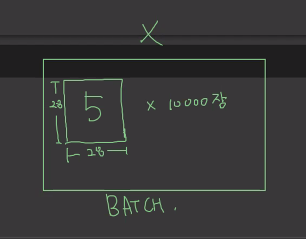

BATCH를 한꺼번에 10000문제풀고 10000문제 맞추려고 흘려버리면 신경망이 힘드러. 그렇다고 방금처럼 1문제풀고 채점하고 1문제풀고 채점하고는 번거로움.

해결방안: 이미지 한 100개? 정도 걸러내서 채점하고 하는식으로!
(랜덤으로뽑아도 되고 순서대로뽑아도됨)

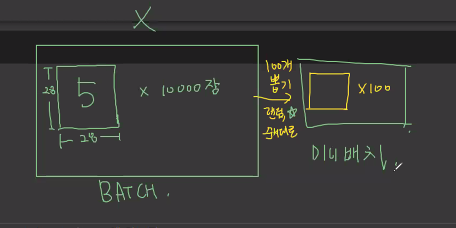

이제 (100, 784)를 집어넣을거

20000개의 Dataset
batch_size = 100개
미니배치는 몇개? 200개

200번 돌아야함 200번돌면 모든데이터 1번사용한거. = 1에폭 이라고함

In [ ]:
# 미니배치를 이용한 예측
X, t = get_test_data()

net = init_network()
batch_size = 100

acc_count = 0

for i in range(0, len(X), batch_size):
  X_batch = X[i : i + batch_size]  # X_batch의 shape : (100, 784)

  pred_batch = predict(net, X_batch) # pred_batch = (100,10) 100장의 이미지에대한 10개의 확률!
  pred_batch_arg = np.argmax(pred_batch) #⭐⭐⭐⭐(여기 주목) 예측값 100개!

  acc_count += np.sum(pred_batch_arg == y[i : i + batch_size])

print(acc_count / len(X))

# 정확도가 엉망진창이네 왜이러징.
# 아까는 1장짜리 (,784) 돌려서괜찮았는데 1차원배열
# 지금은 (100, 10)짜리 axis가 0으로 되어있어서그래!⭐⭐⭐⭐ 아래 빨간사진

0.0023


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


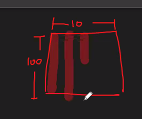

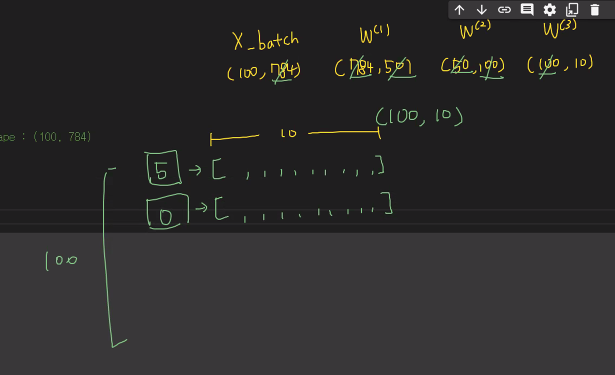

pred_batch결과

In [ ]:
# 미니배치를 이용한 예측
X, t = get_test_data()

net = init_network()
batch_size = 100

acc_count = 0

for i in range(0, len(X), batch_size):
  X_batch = X[i : i + batch_size]  # X_batch의 shape : (100, 784)

  pred_batch = predict(net, X_batch) # (100,10) 100장의 이미지에대한 10개의 확률!
  pred_batch_arg = np.argmax(pred_batch, axis=1) #⭐⭐⭐⭐(여기 주목) 예측값 100개!

  acc_count += np.sum(pred_batch_arg == y[i : i + batch_size])

print(acc_count / len(X))

# 이제 잘 나오는군

0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
